# 02. Gradient Descent
### (Theory, Intuition, and Implementation)

In machine learning, our goal is often to find the best parameters (weights and biases) for a model that accurately predicts outcomes.  This involves **minimizing a "cost function"** which measures how poorly our model is performing. Gradient Descent is a powerful and widely used **iterative algorithm that helps us find the minimum of this cost function**.  It works by taking small, calculated steps downhill along the cost function's surface, guided by the gradient (slope) at each point.

</br>

### Why is this approach so effective?
Gradient Descent is preferred because it's a relatively simple yet efficient way to **find the minimum of complex functions**, even when analytical solutions are impossible.  It's applicable in a wide range of machine learning models, including *linear regression, logistic regression, and neural networks*.

### Where to use Gradient Descent? How does it helps?
Specifically in **cost calculations**, gradient descent helps us find the parameters that **minimize the difference between our model's predictions and the actual values**, leading to a better fit.  Gradient Descent is typically employed when we have a **differentiable cost function and need to optimize model parameters**, making it a cornerstone of many machine learning algorithms.

#### Linear Regression Parameters & Functions
* Linear Function, $ f_{w,b}(x) = {y} = wx + b $ , or also known as, Predicted Function, $ \hat{y} = w_{pred}\cdot x + b_{pred} $
* Cost Function, $\text{J(w,b)} = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 $
</br>
</br>


#### Derivatives
* Partial Derivative of Cost with $w$,  $$ J(w,b) \text{ with } w =  \frac{\partial}{\partial w} J(w,b) = \frac{\partial}{\partial w} \left[{\frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2} \right] $$
</br>
$$ = \frac{\partial}{\partial w} J(w,b) = \frac{\partial}{\partial w} \left[ \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \right] $$
$$ = {2} \cdot \left[{ \frac{1}{2m} \sum_{i=1}^{m} [ {(f_{w,b}(x^{i})) - (w \cdot x + b)}] } \right] \cdot (x^{i})$$
$$ = \frac{1}{m} \sum_{i=1}^{m} \left[ {(f_{w,b}(x^{i})) - (wx + b)} \right] \cdot (x^{i}) $$
$$ \color{dodgerblue}{= \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)}) x^{(i)} ........^{(eq. 01)} } $$

* Similarly, Partial Derivative of Cost with $b$,  $$ J(w,b) \text{ with } b =  \frac{\partial}{\partial b} J(w,b) = \frac{\partial}{\partial b} [^{\frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2}] $$
</br>
$$ = \frac{\partial}{\partial b} [^{ \frac{1}{2m} \sum_{i=1}^{m} [ {(f_{w,b}(x^{i})) - (w \cdot x + b)}]^{2} }] $$
$$ = {2} \cdot [^{ \frac{1}{2m} \sum_{i=1}^{m} [ {(f_{w,b}(x^{i})) - (w \cdot x + b)}] }]$$
$$ = \frac{1}{m} \sum_{i=1}^{m} [ {(f_{w,b}(x^{i})) - (wx + b)}] $$
$$ \color{indigo}{= \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{i}) - y^{(i)}) ........^{(eq. 02)} } $$

</br>

#### Gradient Descent Updating Method
For each step towards training,</br>
$ w_{new} = w_{old} - \alpha \color{dodgerblue}{\frac{\partial}{\partial w} J(w,b)} = w_{old} - \alpha \cdot \color{dodgerblue}{(eq. 01)}$

$ b_{new} = b_{old} - \alpha \color{indigo}{\frac{\partial}{\partial b} J(w,b)} = b_{old} - \alpha \cdot \color{indigo}{(eq. 02)}$, where $ \alpha $ is the learning rate.
</br></br>

#### Correct way of Implementing Gradient Descent Algorithm

$\textbf{function}$ $ \textit{gradient_descent(𝛼, w, b)}:$

   1. $temp_{w}$ $← w - 𝛼 \cdot {\frac{\partial}{\partial w} J(w,b)}$ `   # store new w`
   2. $temp_{b}$ $← b - 𝛼 \cdot {\frac{\partial}{\partial b} J(w,b)}$ `   # store new b`
   3. $w ← temp_{w}$ `   # update new w`
   4. $b ← temp_{b}$ `   # update new b`


**It uses temporary variables to ensure that the updates for w and b are calculated based on the same (original) values, effectively achieving a simultaneous update in a sequential programming environment. By not emphasizing the use of temporary variables, it could have led to an incorrect implementation where w is updated before b, violating the simultaneous update rule in Gradient Descent.**

## What we will do to demonstrate Gradient Descent?
*Let's breakdown the code before we start. I will list all the tasks step-by-step that we are going to code to demonstrate gradient descent. Make sure to follow this list if you are lost...*

</br>

**1. Create a Linear Dataset with a Linear Function:** We will take a range of data points *(from -60 to 60)* for feature `X` and targets `y`. Will randomly choose parameters `w` and `b` for better demonstration.


**2. Plot the Linear Data We Created:** Then we will plot the Linear data we just created.


**3. Initialize Random Line for Regression:** Then again we will randomly initialize the parameters `w` and `b` to start off with a random and initial regression line.


**4. Compare Our Linear Data with the Random Regression Line to Visualize the Difference:** Plot the two lines on a single plot to make sure the two lines are separate and to show the difference between the lines.


**5. Define Cost Function, Gradient Calculations, and Loop for performing Gradient Descent:** We will define functions for calculating the cost, computing the gradients, and a loop for performing Gradient descent in each iteration.


**6. Choose a Learning Rate (alpha) and Number of Epochs:** For the first time, we will use `alpha = 0.01` and `epochs = 20` to demonstrate if our functions are working correctly as expected.


**7. Perform Gradient Descent and Visualize the Cost Reduction Graph to Evaluate:** We will perform GradDesc for the first time and evaluate our approach using the visualization of Cost reduction plot and comparing the final regression line with the original line.


**8. Focusing on the Learning Rate (alpha,𝛼):** We will build a loop to perform our GradDesc with different values of alpha to select the best one.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

### 1. Create a Linear Dataset with a Linear Function

In [2]:
# let's create a linear function
X = np.arange(-60, 60, 0.1)
w_org = np.random.rand()
b_org = np.random.rand()
print(f"Randomly Chosen Value of:\n w = {w_org}, and \n b = {b_org}")

y = w_org * X + b_org
print(f"\nOur Linear Equation (y = wX + b)\t: y = {w_org:.4f} X + {b_org:.4f}")
print(f"Length of Corresponding y values\t: {len(y)}")

Randomly Chosen Value of:
 w = 0.5165848278097472, and 
 b = 0.529859921321847

Our Linear Equation (y = wX + b)	: y = 0.5166 X + 0.5299
Length of Corresponding y values	: 1200


### 2. Plot the Linear Data

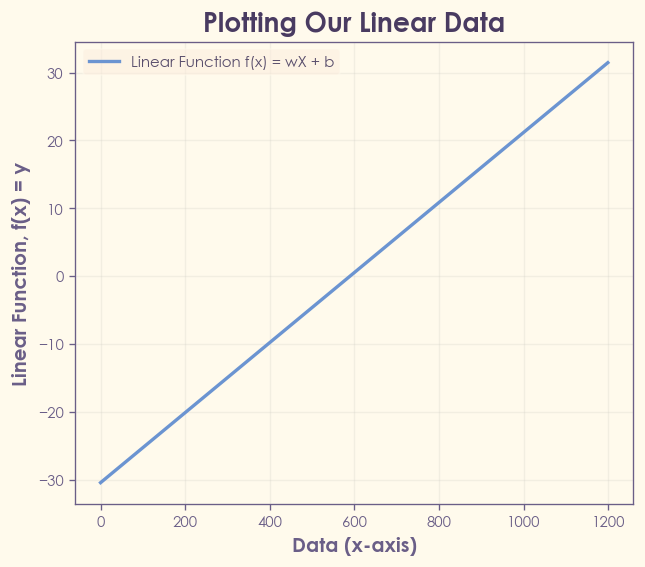

In [3]:
# let's plot the linear function
plt.figure(figsize=(6,5))
plt.title('Plotting Our Linear Data')
plt.plot(y, linewidth=2, label='Linear Function f(x) = wX + b')
plt.xlabel('Data (x-axis)')
plt.ylabel('Linear Function, f(x) = y')
plt.legend(prop={'size': 9})

### 3. Initialize Random Line for Regression

In [4]:
# let's create a regression line with a random parameters
w_reg = np.random.rand()
b_reg = np.random.rand()
print(f"Randomly Chosen Value of:\n w = {w_reg}, and \n b = {b_reg}")

# create the regression line
y_hat = w_reg * X + b_reg
print(f"\nRandom Regression Line\t: y = {w_reg:.4f}X + {b_reg:.4f}")
print(f"Length of y_hat values\t: {len(y_hat)}")

Randomly Chosen Value of:
 w = 0.7219189013613219, and 
 b = 0.438895024517433

Random Regression Line	: y = 0.7219X + 0.4389
Length of y_hat values	: 1200


### 4. Compare Linear Data with the Random Regression Line

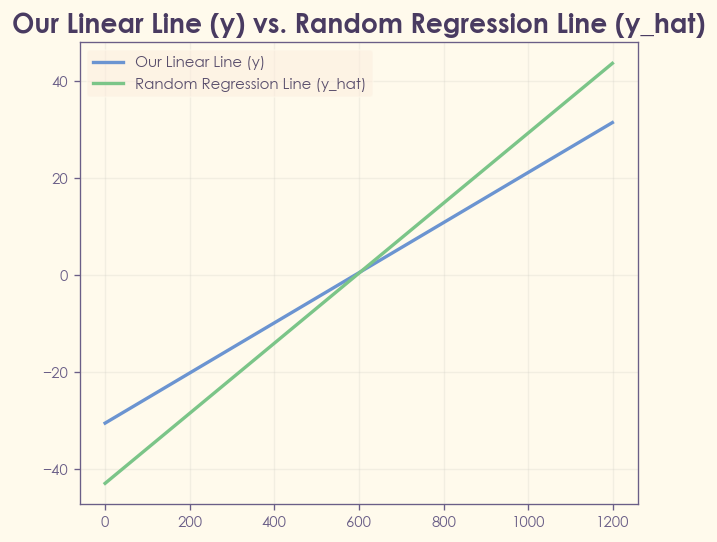

In [5]:
# visualize the two different linear lines (Our Linear Line vs. Initial Regression Line)
plt.figure(figsize=(6,5))
plt.title('Our Linear Line (y) vs. Random Regression Line (y_hat)')
plt.plot(y, linewidth=2, label='Our Linear Line (y)')
plt.plot(y_hat, linewidth=2, label='Random Regression Line (y_hat)')
plt.legend(prop={'size': 9})

### 5. Define Cost Function, Gradient Calculations, and Gradient Descent

In [6]:
# 1. Cost Function (J) for the regression
def CostFunction(y, y_hat):
    """
    Computes the Mean Squared Error (MSE) cost function.
    """
    m = len(y)
    diff = y - y_hat
    cost = (1 / (2 * m)) * np.sum(diff**2)
    return cost

In [7]:
# 2. Gradient (partial derivatives) function
def compute_gradients(X, y, w, b):
    """
    Computes partial derivatives of the cost function with respect to w and b.
    """
    
    m = len(X)
    # y_hat = wX + b
    y_hat = w * X + b
    
    # diff = (y_hat - y)
    diff = y_hat - y
    
    # partial derivatives
    dw = (1/m) * np.sum(diff * X)
    db = (1/m) * np.sum(diff)
    
    return dw, db

In [8]:
# 3. Gradient Descent function
def gradient_descent(X, y, w_init, b_init, alpha=0.01, epochs=10):
    """
    Iteratively updates w and b to minimize the cost function.
    """
    w = w_init
    b = b_init
    
    cost_history = []
    
    for i in range(epochs):
        # 1) Compute predictions and cost
        y_hat = w * X + b
        cost = CostFunction(y, y_hat)  # using existing CostFunction()
        
        # 2) Compute gradients
        dw, db = compute_gradients(X, y, w, b)
        
        # 3) Update parameters
        w = w - alpha * dw
        b = b - alpha * db
        
        # 4) Store cost for analysis
        cost_history.append(cost)
        
        # Print the progress occasionally:
        if i % 10 == 0:
            print(f"Epoch {i} \t | Cost: {cost} \t| w: {w} \t| b: {b} |")
    
    return w, b, cost_history

### 6. Choose a Learning Rate (alpha) and Number of Epochs

In [9]:
# Initialize parameters for gradient descent
alpha = 0.01   # learning rate
epochs = 100    # number of iterations

### 7. Perform Gradient Descent and  Evaluate

In [10]:
# Perform gradient descent
final_w, final_b, cost_hist = gradient_descent(X, y, w_reg, b_reg, alpha, epochs)

Epoch 0 	 | Cost: 25.302355407704784 	| w: -1.742138885940604 	| b: 0.43990734052225117 |
Epoch 10 	 | Cost: 1.701989302071335e+22 	| w: -58586267396.28757 	| b: 2443127.46495184 |
Epoch 20 	 | Cost: 1.1450480356255415e+43 	| w: -1.5195999461126276e+21 	| b: 6.336938411723921e+16 |
Epoch 30 	 | Cost: 7.703544330709073e+63 	| w: -3.9415106966713265e+31 	| b: 1.64366355749426e+27 |
Epoch 40 	 | Cost: 5.182716655444057e+84 	| w: -1.0223418743674432e+42 	| b: 4.263304634990223e+37 |
Epoch 50 	 | Cost: 3.486778394140153e+105 	| w: -2.6517317559681176e+52 	| b: 1.1058082007023247e+48 |
Epoch 60 	 | Cost: 2.3458013196750593e+126 	| w: -6.878013590082563e+62 	| b: 2.8682251948513217e+58 |
Epoch 70 	 | Cost: 1.5781857088013333e+147 	| w: -1.7840066529689066e+73 	| b: 7.439550333553106e+68 |
Epoch 80 	 | Cost: 1.0617566417814833e+168 	| w: -4.62732400300348e+83 	| b: 1.9296570319798245e+79 |
Epoch 90 	 | Cost: 7.143184481269465e+188 	| w: -1.2002268821777398e+94 	| b: 5.0051093065067645e+89 |


In [11]:
# Print results
print("After Gradient Descent:")
print(f"\tFinal w: {final_w}\n\tFinal b: {final_b} ")

After Gradient Descent:
	Final w: 2.830110845916141e+103
	Final b: -1.180194706824048e+99 


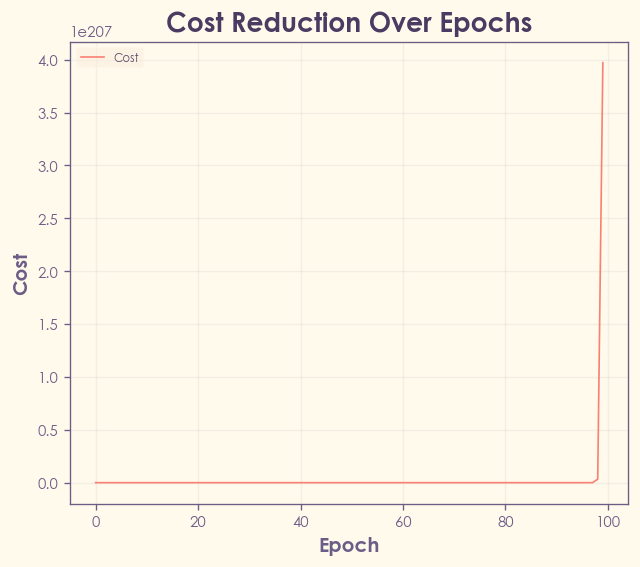

In [12]:
# 4. Plot the cost over iterations
plt.figure(figsize=(6,5))
plt.title("Cost Reduction Over Epochs")
plt.plot(cost_hist, c='salmon', label='Cost')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()
plt.show()

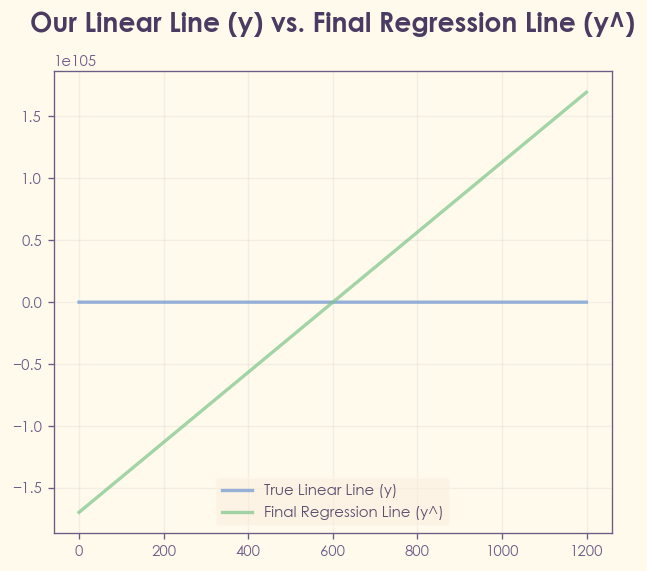

In [13]:
# 5. Visualize the final regression line
y_hat_final = final_w * X + final_b

plt.figure(figsize=(6,5))
plt.title('Our Linear Line (y) vs. Final Regression Line (y^)\n')
plt.plot(y, linewidth=2, label='True Linear Line (y)', alpha=0.7)
plt.plot(y_hat_final, linewidth=2, label='Final Regression Line (y^)', alpha=0.7)
plt.legend(prop={'size': 9}, loc='lower center')
plt.show()

### Observation:
The regression line appears to be nearly flat, almost parallel to the X-axis, indicating poor model performance. Upon examining the cost reduction curve, we observe an abnormal trend—possibly exponential growth—suggesting that the cost is not decreasing as expected. This often points to instability in the optimization process.

**Given that the cost function and its implementation have already been verified, the most likely cause of this behavior is an inappropriate choice of hyperparameters, particularly the learning rate, alpha (𝛼).**

#### 👉 To address this, we will now perform the gradient descent algorithm with multiple learning rate values and compare the results to determine the optimal range for convergence and stability.

### 8. Focusing on the Learning Rate (alpha,𝛼) and Make it Better 

In [ ]:
# Define various learning rates to test
alpha_values = [0.1, 0.01, 0.001, 0.0001, 0.00001]
epochs = 100
w_init = 0.0
b_init = 0.0

# Store results
results = {}
final_params = []

**Let's perform the gradient descent with various values of learning rate alpha.**

In [15]:
# Run gradient descent for each alpha separately and store results
for alpha in alpha_values:
    print(f"\n\nRunning gradient descent for alpha = {alpha}")
    w, b, cost_history = gradient_descent(X, y, w_init, b_init, alpha=alpha, epochs=epochs)
    print("=" * 120)
    
    results[alpha] = cost_history
    final_params.append({'alpha': alpha, 'final_cost': cost_history[-1], 'w': w, 'b': b})



Running gradient descent for alpha = 0.1
Epoch 0 	 | Cost: 160.24284286547808 	| w: 61.98761613503618 	| b: 0.05040306799318009 |
Epoch 10 	 | Cost: 5.192175962244061e+43 	| w: 3.5006310773842095e+22 	| b: -1.4598107611347448e+18 |
Epoch 20 	 | Cost: 1.6838399547722672e+85 	| w: 1.99352666041252e+43 	| b: -8.313277255293583e+38 |
Epoch 30 	 | Cost: 5.460749046074405e+126 	| w: 1.1352663156796047e+64 	| b: -4.734214910818919e+59 |
Epoch 40 	 | Cost: 1.7709391002208115e+168 	| w: 6.465073345194421e+84 	| b: -2.696023497538113e+80 |
Epoch 50 	 | Cost: 5.743214475210965e+209 	| w: 3.681706466708857e+105 	| b: -1.53532166076093e+101 |
Epoch 60 	 | Cost: 1.862543579514398e+251 	| w: 2.0966448148776853e+126 	| b: -8.743293981503283e+121 |
Epoch 70 	 | Cost: 6.040290852036956e+292 	| w: 1.1939896674280697e+147 	| b: -4.979099272858973e+142 |
Epoch 80 	 | Cost: inf 	| w: 6.799488954013223e+167 	| b: -2.8354793538260584e+163 |
Epoch 90 	 | Cost: inf 	| w: 3.87214825194734e+188 	| b: -1.6147384

C:\Users\MUBASHIR MOHSIN\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\MUBASH~1\AppData\Local\Temp/ipykernel_3536/1104751371.py:8: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(diff**2)


##### Store the results in a DataFrame for future tasks

In [16]:
# Convert cost histories into a DataFrame for visualization
df_costs = pd.DataFrame(results)
df_costs.index.name = "Epoch"

# Create a DataFrame summarizing final values
df_final_params = pd.DataFrame(final_params)

df_final_params

,alpha,final_cost,w,b
0,0.10000,inf,-1.853020e+207,7.727345e+202
1,0.01000,2.513507e+208,-7.119631e+103,2.968983e+99
2,0.00100,1.151578e-01,5.165648e-01,5.042723e-02
3,0.00010,1.376344e-01,5.165615e-01,5.251119e-03
4,0.00001,1.480475e+01,3.621025e-01,5.145180e-04


**Filter out the unstable learning rates (which causes overflow and infinite values)**

In [17]:
print("Filtered (unstable) learning rates:")
for alpha in alpha_values:
    if df_costs[alpha].isnull().any() or (df_costs[alpha] > 1e6).any():
        print(f"  - alpha = {alpha}")

Filtered (unstable) learning rates:
  - alpha = 0.1
  - alpha = 0.01


#### Plot the Cost Function vs. Epochs with Logarithmic Scale

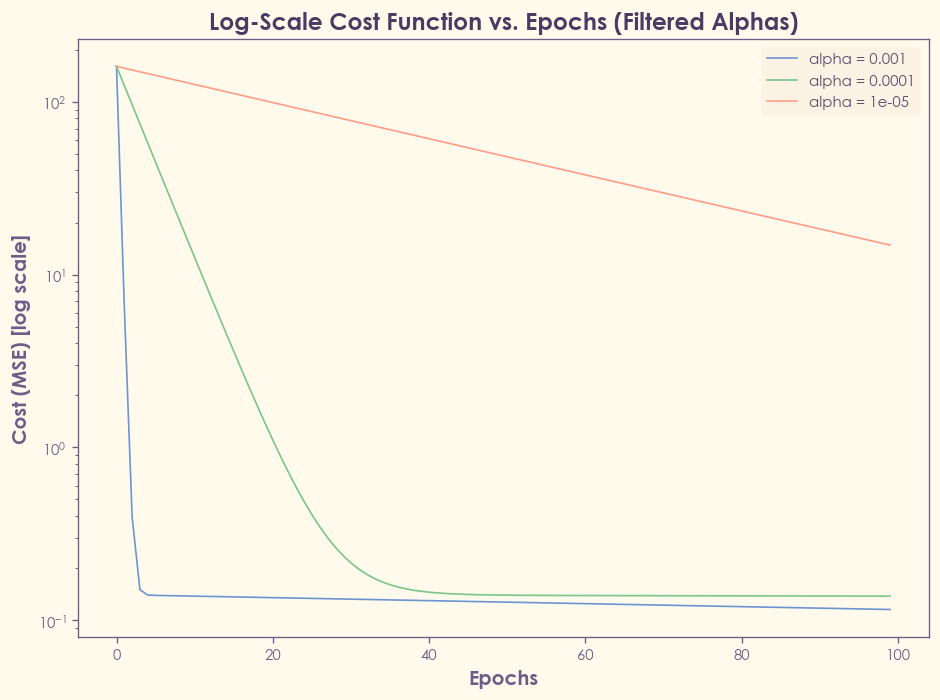

In [27]:
plt.figure(figsize=(8, 6))

for alpha in alpha_values:
    # Filter if cost exploded or became NaN/inf at any point
    if df_costs[alpha].isnull().any() or (df_costs[alpha] > 1e6).any():
        continue
    plt.plot(df_costs.index, df_costs[alpha], label=f"alpha = {alpha}")

plt.yscale('log')
plt.title("Log-Scale Cost Function vs. Epochs (Filtered Alphas)", fontsize=14, weight='bold')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Cost (MSE) [log scale]", fontsize=12)
plt.legend(prop={'size': 9}, loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.show()

In [19]:
# Sort by final cost to see which alpha performed best
df_final_params = df_final_params.sort_values(by="final_cost").reset_index(drop=True)
print(df_final_params)

     alpha     final_cost              w              b
0  0.00100   1.151578e-01   5.165648e-01   5.042723e-02
1  0.00010   1.376344e-01   5.165615e-01   5.251119e-03
2  0.00001   1.480475e+01   3.621025e-01   5.145180e-04
3  0.01000  2.513507e+208 -7.119631e+103   2.968983e+99
4  0.10000            inf -1.853020e+207  7.727345e+202


In [20]:
valid_alphas = []
final_costs = {}

# Loop through each alpha and check if it's stable
for alpha in alpha_values:
    cost_series = df_costs[alpha]

    # Skip if any value is NaN, inf, or cost explodes
    if cost_series.isnull().any() or (cost_series > 1e6).any():
        continue

    # Store the final cost
    final_costs[alpha] = cost_series.iloc[-1]
    valid_alphas.append(alpha)

# Get the alpha with the minimum final cost
best_alpha = min(final_costs, key=final_costs.get)
best_cost = final_costs[best_alpha]

print(f"Best Alpha =\t {best_alpha}\nFinal Cost =\t {best_cost:.6f}")

Best Alpha =	 0.001
Final Cost =	 0.115158


In [29]:
print(f"Valid Learning Rates that could be used are:\t {valid_alphas}")

Valid Learning Rates that could be used are:	 [0.001, 0.0001, 1e-05]


#### Plot the Final Costs for Valid Alphas

In [33]:
final_costs

{0.001: 0.11515781095011984,
 0.0001: 0.13763443831622357,
 1e-05: 14.8047547355446}

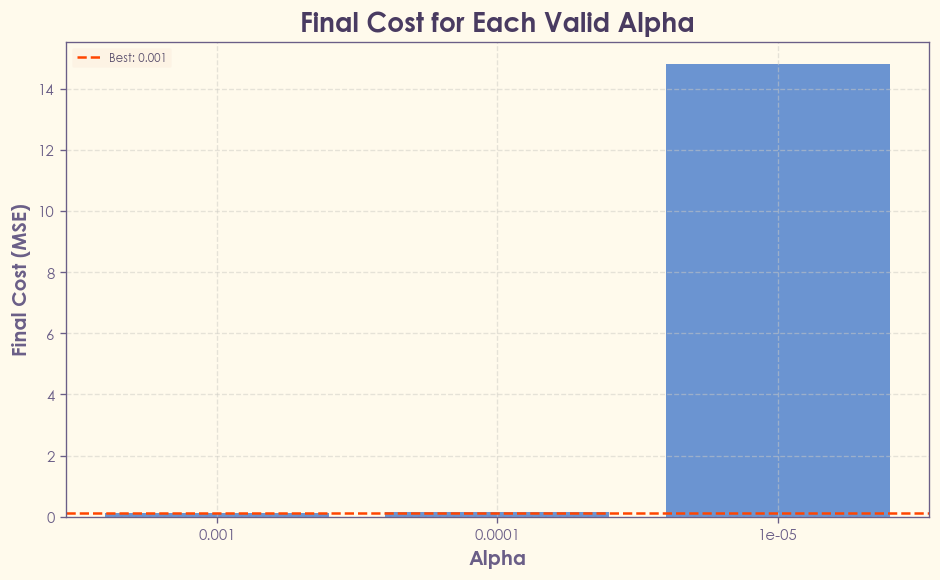

In [21]:
plt.figure(figsize=(8, 5))
plt.bar([str(a) for a in final_costs.keys()], final_costs.values())
plt.axhline(y=best_cost, color='orangered', linestyle='--', linewidth=1.5, label=f"Best: {best_alpha}")
plt.title("Final Cost for Each Valid Alpha")
plt.xlabel("Alpha")
plt.ylabel("Final Cost (MSE)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Reiterate the Gradient Descent using the Best Alpha Value

In [22]:
# Initialize parameters for gradient descent
alpha = best_alpha   # learning rate
epochs = 100    # number of iterations

In [23]:
# Perform gradient descent
final_w, final_b, cost_hist = gradient_descent(X, y, w_reg, b, alpha, epochs)

Epoch 0 	 | Cost: 25.442822102253103 	| w: 0.4754912036058031 	| b: 0.001054130095352619 |
Epoch 10 	 | Cost: 0.13732294940332848 	| w: 0.5165629911414413 	| b: 0.006316748475933769 |
Epoch 20 	 | Cost: 0.1346024315091548 	| w: 0.5165632126918465 	| b: 0.011528672658432479 |
Epoch 30 	 | Cost: 0.13193581005166405 	| w: 0.5165634278724882 	| b: 0.016688711619228375 |
Epoch 40 	 | Cost: 0.1293220172832073 	| w: 0.516563640910985 	| b: 0.02179738188067305 |
Epoch 50 	 | Cost: 0.12676000660964884 	| w: 0.5165638518286624 	| b: 0.02685519482326055 |
Epoch 60 	 | Cost: 0.12424875217102435 	| w: 0.5165640606466333 	| b: 0.03186265673664141 |
Epoch 70 	 | Cost: 0.12178724843077997 	| w: 0.5165642673858006 	| b: 0.03682026887030251 |
Epoch 80 	 | Cost: 0.11937450977314125 	| w: 0.5165644720668592 	| b: 0.04172852748374236 |
Epoch 90 	 | Cost: 0.11700957010845946 	| w: 0.5165646747102974 	| b: 0.04658792389614703 |


In [24]:
# Print results
print("Before Gradient Descent:")
print(f"\tInitial w: {w}\n\tInitial b: {b} ")
print("After Gradient Descent:")
print(f"\tFinal w: {final_w}\n\tFinal b: {final_b} ")
print("Original Linear Parameters:")
print(f"\tOriginal w: {w_org}\n\tOriginal b: {b_org} ")

Before Gradient Descent:
	Initial w: 0.3621024813181452
	Initial b: 0.0005145179883417099 
After Gradient Descent:
	Final w: 0.516564855363996
	Final b: 0.050920005618490284 
Original Linear Parameters:
	Original w: 0.5165848278097472
	Original b: 0.529859921321847 


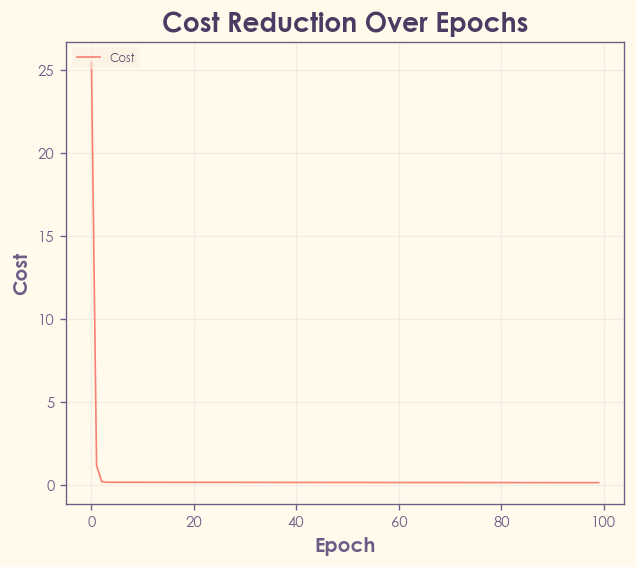

In [25]:
# 4. Plot the cost over iterations
plt.figure(figsize=(6,5))
plt.title("Cost Reduction Over Epochs")
plt.plot(cost_hist, c='salmon', label='Cost')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()
plt.show()

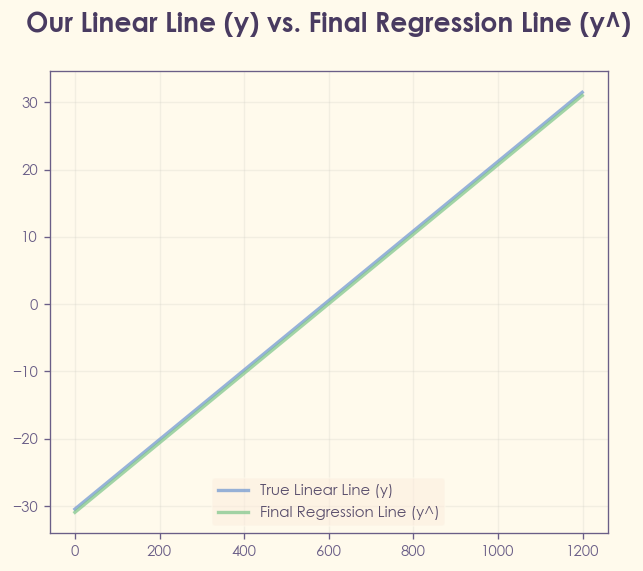

In [26]:
# 5. Visualize the final regression line
y_hat_final = final_w * X + final_b

plt.figure(figsize=(6,5))
plt.title('Our Linear Line (y) vs. Final Regression Line (y^)\n')
plt.plot(y, linewidth=2, label='True Linear Line (y)', alpha=0.7)
plt.plot(y_hat_final, linewidth=2, label='Final Regression Line (y^)', alpha=0.7)
plt.legend(prop={'size': 9}, loc='lower center')
plt.show()

**Now the regression line (green) looks near perfect to the true linear line (blue). Congratulations! We have successfully implemented the Gradient Descent process from scratch!**